# Predicción del Clima
## Jahzeel Ulises Mendez Diaz

In [97]:
import numpy as np
import pandas as pd

## Dataframe

In [98]:
data = pd.read_csv("data/clima_copy.csv")
data

YEAR  MO  DY  WS2M   RH2M  T2M_MAX  T2M_MIN  PRECTOTCORR
0     2015   1   1  0.87  65.88    19.51     5.12         0.00
1     2015   1   2  1.62  74.38    17.51     4.07         0.00
2     2015   1   3  1.22  69.75    15.12     4.48         0.00
3     2015   1   4  1.67  69.00    17.66     3.99         0.13
4     2015   1   5  1.86  79.25    15.67     2.11         0.12
...    ...  ..  ..   ...    ...      ...      ...          ...
1822  2019  12  28  1.38  66.94    20.09     6.00         0.00
1823  2019  12  29  1.05  62.69    18.51     7.58         0.02
1824  2019  12  30  1.38  60.62    20.55     5.02         0.03
1825  2019  12  31  1.16  57.25    21.08     5.01         0.00
1826  2020   1   1  1.88  68.38    20.46     4.74         0.00

[1827 rows x 8 columns]

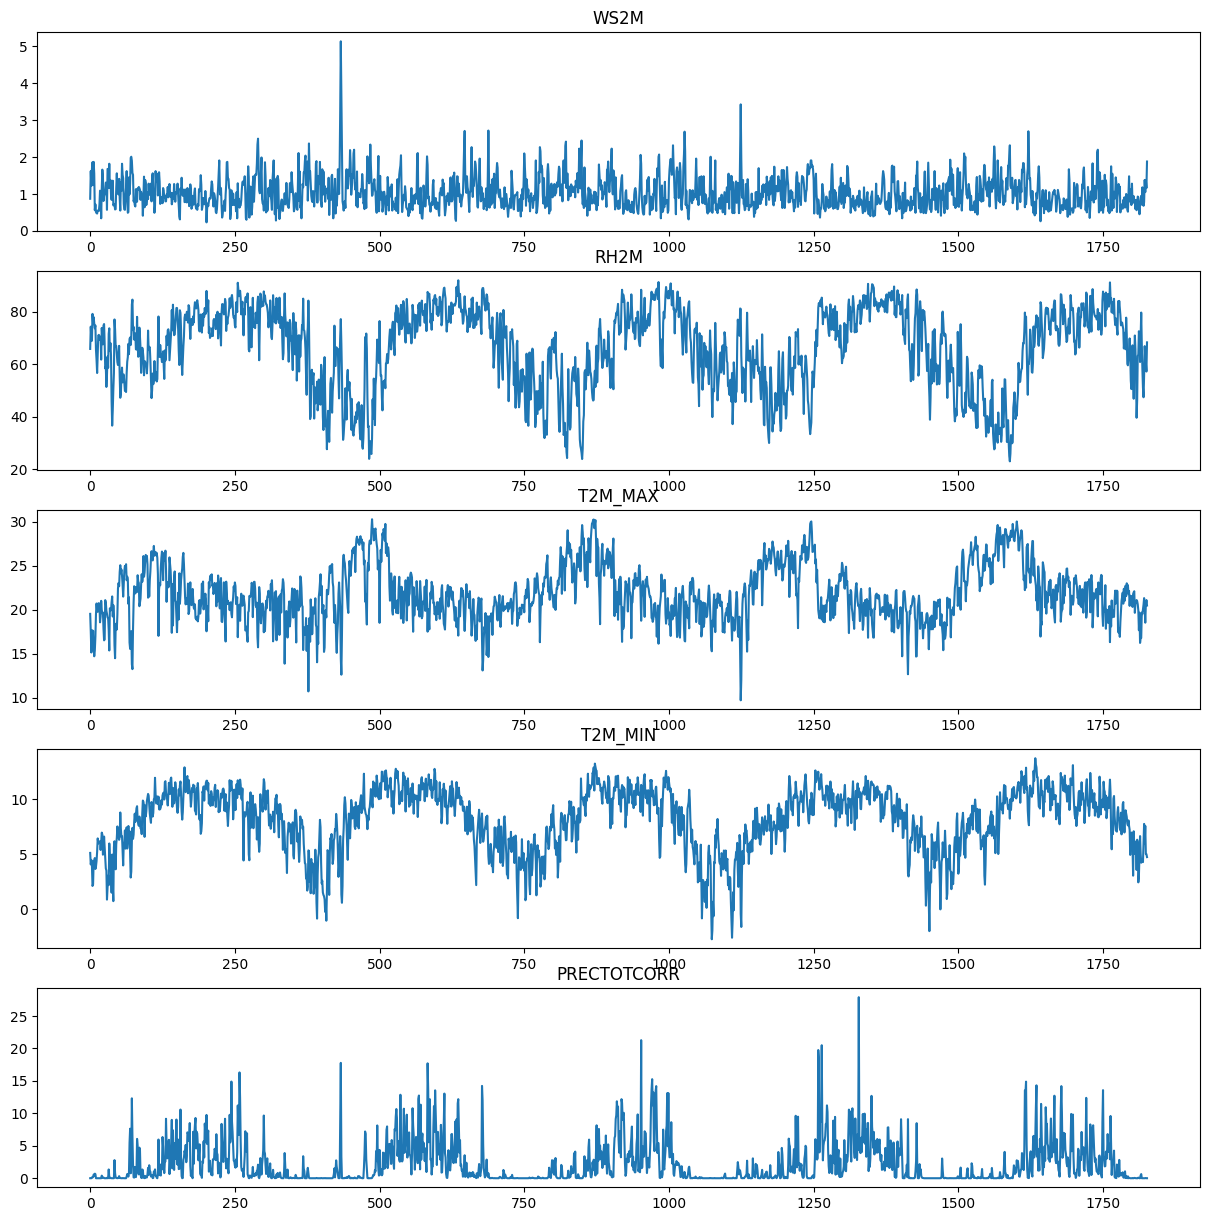

In [99]:
from matplotlib import pyplot as plt

fig,ax = plt.subplots(5,1,figsize=(15,15))
i = 0
for column in data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]].columns:
    ax[i].plot(data[column].squeeze())
    ax[i].set_title(column)
    i+=1

In [100]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i+seq_length)].values
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [101]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_size = int(data.shape[0]*0.7)
val_size = int(data.shape[0]*0.15)

train_data = data[:train_size]
val_data = data[train_size:train_size + val_size]
test_data = data[train_size + val_size:]

train_data = scaler.fit_transform(train_data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]])
train_data = pd.DataFrame(train_data,columns=["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"])

val_data = scaler.transform(val_data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]])
val_data = pd.DataFrame(val_data,columns=["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"])

test_data = scaler.transform(test_data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]])
test_data = pd.DataFrame(test_data,columns=["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"])

X_train, y_train = create_sequences(train_data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]],30)
X_val, y_val = create_sequences(val_data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]], 30)
X_test, y_test = create_sequences(test_data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]], 30)

In [102]:
%%latex
Una **red LSTM (Long Short-Term Memory)** es un tipo de red neuronal recurrente (RNN) diseñada para modelar secuencias y datos dependientes del tiempo. A diferencia de las RNN tradicionales, las LSTM están especialmente diseñadas para manejar problemas de gradientes desaparecidos y explosivos, permitiendo que las redes aprendan dependencias a largo plazo en los datos.

### Arquitectura de una Celda LSTM

Una celda LSTM tiene una estructura más compleja que una RNN tradicional y consta de varios componentes clave:

1. **Estado de la Celda $( C_t )$**:
   - Es la memoria a largo plazo de la celda que transporta información a lo largo de la secuencia.
   - Las LSTM permiten que la información fluya a través de muchas capas sin cambios significativos, mitigando el problema de los gradientes desaparecidos.

2. **Estado Oculto $( h_t )$**:
   - Es la salida de la celda en el tiempo $ t $, y se utiliza para predecir la siguiente palabra en una secuencia, por ejemplo.

3. **Puertas**:
   - Las LSTM tienen tres puertas que controlan el flujo de información hacia y desde el estado de la celda y el estado oculto:
     - **Puerta de Entrada** $( i_t )$: Controla cuánto de la nueva información entra en el estado de la celda.
     - **Puerta de Olvido** $( f_t )$: Decide cuánta información del estado de la celda anterior se mantiene.
     - **Puerta de Salida** $( o_t )$: Decide cuánto del estado de la celda se usa para el estado oculto.

### Fórmulas de la Celda LSTM

A continuación se presentan las ecuaciones matemáticas que definen el funcionamiento interno de una celda LSTM. 

1. **Puerta de Olvido** $( f_t )$:
   $$ f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f) $$

2. **Puerta de Entrada** $( i_t )$ y $(\tilde{C}_t)$ (nuevo candidato para $( C_t )$):
   $$ i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i) $$
   $$ \tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C) $$

3. **Actualización del Estado de la Celda** $( C_t )$:
   $$ C_t = f_t * C_{t-1} + i_t * \tilde{C}_t $$

4. **Puerta de Salida** $( o_t )$:
   $$ o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o) $$

5. **Estado Oculto** $( h_t )$:
   $$ h_t = o_t * \tanh(C_t) $$

Aquí, $(\sigma)$ es la función sigmoide, que limita sus valores entre 0 y 1, y $(\tanh)$ es la función tangente hiperbólica, que limita sus valores entre -1 y 1. Los pesos $(W_f, W_i, W_C, W_o)$ y los sesgos $(b_f, b_i, b_C, b_o)$ se aprenden durante el entrenamiento.

### Funcionamiento de una Celda LSTM

1. **Puerta de Olvido**: Decide cuánta información del estado de la celda anterior debe olvidarse.
2. **Puerta de Entrada**: Determina cuánta información de la nueva entrada debe almacenarse en el estado de la celda.
3. **Actualización del Estado de la Celda**: Combina la información retenida y la nueva información para actualizar el estado de la celda.
4. **Puerta de Salida**: Decide cuánto del estado de la celda debe pasar al estado oculto.

<IPython.core.display.Latex object>

![Arquitectura](LSTM.png)

In [103]:
from keras import Sequential
from keras import Input
import keras
model = Sequential()
model = Sequential([
    keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences=True, input_shape=(30, 5))),
    keras.layers.LSTM(50),
    keras.layers.Dense(30),
    keras.layers.Dense(5)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

d:\Projects\ml-project\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [104]:
print(X_train.shape)
print(y_train.shape)
model.compile(optimizer="adam", loss='mse')
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=100, 
    batch_size=32
)

(1248, 30, 5)
(1248, 5)
Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0802 - val_loss: 0.0109
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0126 - val_loss: 0.0103
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0119 - val_loss: 0.0104
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0121 - val_loss: 0.0110
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0108 - val_loss: 0.0098
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0105 - val_loss: 0.0092
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0097 - val_loss: 0.0093
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0093 - val_loss: 0.0090
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0094 - val_loss: 0.0091
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0099 - val_loss: 0.0090
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0096 - val_loss: 0.0085
Epoch 12/100
39/39 ━━━━━━━━━

In [105]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(model.evaluate(X_test,y_test))
print(scaler.inverse_transform(y_test))
print(scaler.inverse_transform(model.predict(X_test)))
print(mean_absolute_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test))))
print(mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test))))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 
0.007245220243930817
[[1.090e+00 4.600e+01 2.912e+01 1.021e+01 7.200e-01]
 [1.430e+00 3.650e+01 2.861e+01 1.007e+01 1.600e-01]
 [1.150e+00 3.038e+01 2.846e+01 1.010e+01 7.000e-02]
 ...
 [1.380e+00 6.062e+01 2.055e+01 5.020e+00 3.000e-02]
 [1.160e+00 5.725e+01 2.108e+01 5.010e+00 0.000e+00]
 [1.880e+00 6.838e+01 2.046e+01 4.740e+00 0.000e+00]]
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
[[ 0.90759754 54.055084   27.774755   11.167167    2.3880932 ]
 [ 0.9569951  48.172462   28.12812    10.412586    1.6107838 ]
 [ 1.0739058  40.717255   28.381657    9.71564     0.7259445 ]
 ...
 [ 1.0538574  60.894157   20.86418     5.648383    0.44880033]
 [ 1.1501086  57.228653   21.204752    4.5797396   0.35434416]
 [ 1.069669   55.2058     21.907118    4.805726    0.4122751 ]]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1.7400468355508032
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8.740861392849183


In [106]:
predicted = []
val = data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]]

X = scaler.transform(data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]])
X = pd.DataFrame(X,columns=["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"])

X,_ = create_sequences(X[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]],30)
pred = model.predict(X)
pred = scaler.inverse_transform(pred)
for i in range(30):
    pred = np.vstack((np.zeros((5,)),pred))
pred

pred = pd.DataFrame(pred,columns=["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"])
pred.describe()

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


WS2M         RH2M      T2M_MAX      T2M_MIN  PRECTOTCORR
count  1827.000000  1827.000000  1827.000000  1827.000000  1827.000000
mean      0.976438    63.799336    22.154112     8.479946     2.391642
std       0.278976    15.506047     3.854171     2.926471     2.316550
min       0.000000     0.000000     0.000000    -2.003129    -0.840439
25%       0.823188    54.456089    20.707531     6.621174     0.391553
50%       0.946691    66.946411    21.996223     9.280551     1.632823
75%       1.104515    76.049801    23.891369    10.877755     4.138848
max       4.457410    86.766365    29.865824    12.831204    13.544166

In [107]:
data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]].describe()

WS2M         RH2M      T2M_MAX      T2M_MIN  PRECTOTCORR
count  1827.000000  1827.000000  1827.000000  1827.000000  1827.000000
mean      1.030881    66.377586    21.871533     8.174992     2.267296
std       0.434082    15.222111     3.170995     2.841092     3.230913
min       0.230000    23.000000     9.690000    -2.740000     0.000000
25%       0.710000    56.030000    19.740000     6.415000     0.020000
50%       0.960000    69.810000    21.480000     8.720000     0.750000
75%       1.270000    78.880000    23.730000    10.390000     3.380000
max       5.140000    92.060000    30.260000    13.740000    27.890000

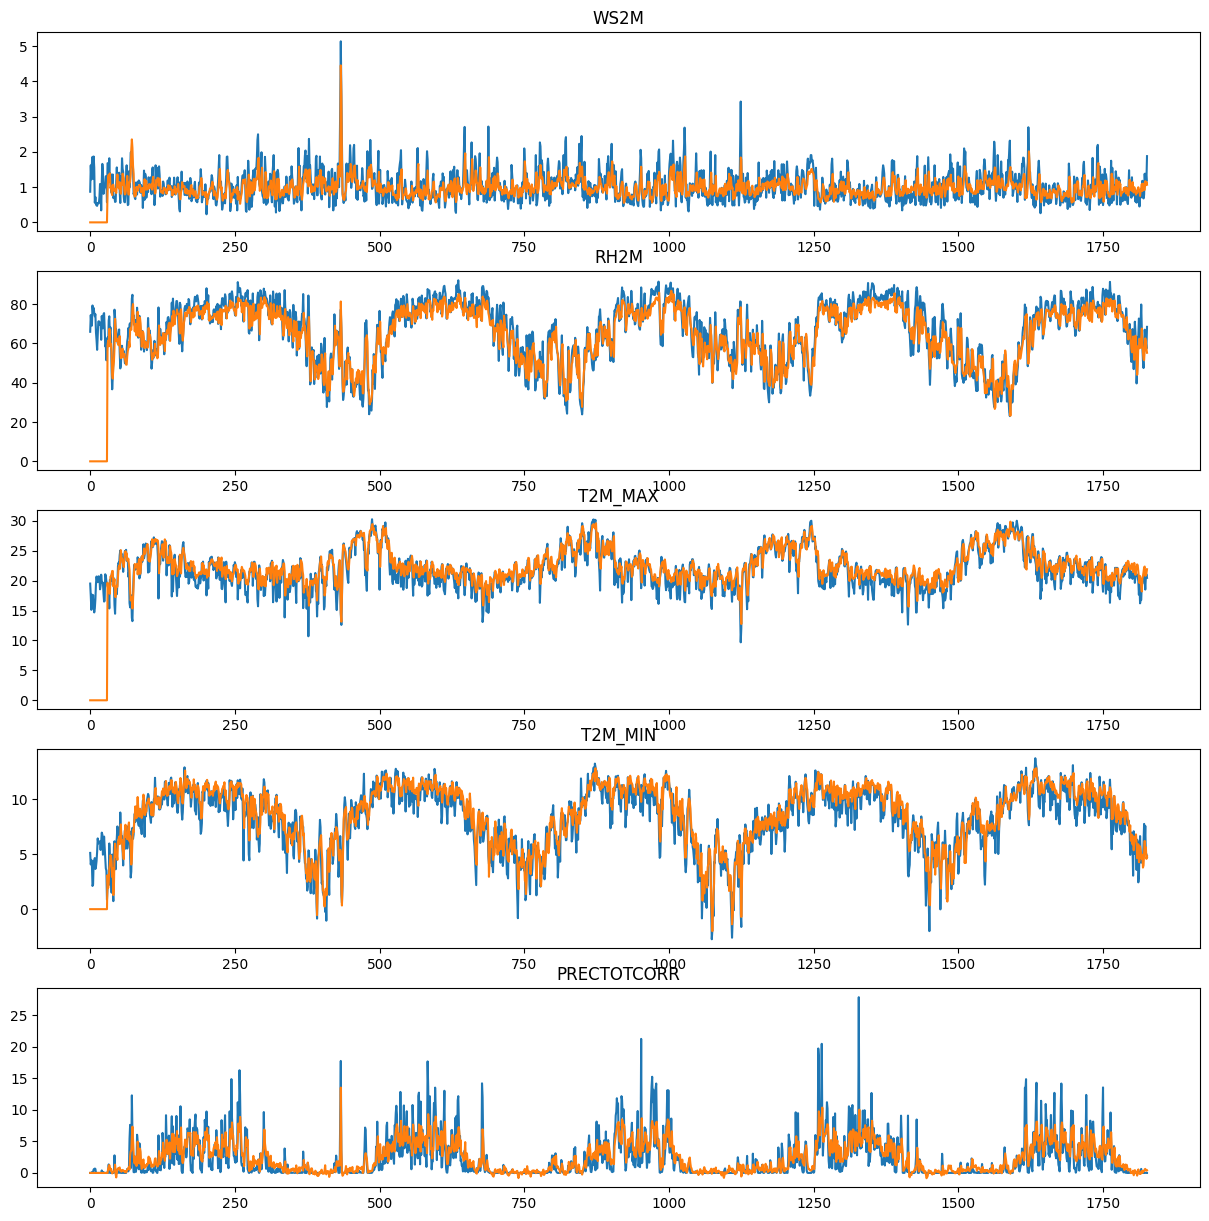

In [108]:
fig,ax = plt.subplots(5,1,figsize=(15,15))
i = 0
for column in pred.columns:
    ax[i].plot(data[column].squeeze())
    ax[i].plot(pred[column].squeeze())
    ax[i].set_title(column)
    i+=1

## Random Forest Regressor

In [109]:
val = data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]]

for i in range(1,12):
    for column in val.columns:
        val[f'lag_{i},{column}'] = val[column].shift(i)
val = val.dropna()
val

C:\Users\PC\AppData\Local\Temp\ipykernel_9072\191440139.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val[f'lag_{i},{column}'] = val[column].shift(i)
C:\Users\PC\AppData\Local\Temp\ipykernel_9072\191440139.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val[f'lag_{i},{column}'] = val[column].shift(i)
C:\Users\PC\AppData\Local\Temp\ipykernel_9072\191440139.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

WS2M   RH2M  T2M_MAX  T2M_MIN  PRECTOTCORR  lag_1,WS2M  lag_1,RH2M  \
66    0.51  67.81    20.64     7.57         0.25        0.49       62.75   
67    1.45  63.88    21.40     6.19         0.88        0.51       67.81   
68    0.99  69.69    16.25     7.10         5.45        1.45       63.88   
69    1.29  70.25    15.53     4.98         7.63        0.99       69.69   
70    1.98  67.38    16.66     2.88         0.76        1.29       70.25   
...    ...    ...      ...      ...          ...         ...         ...   
1822  1.38  66.94    20.09     6.00         0.00        0.78       55.75   
1823  1.05  62.69    18.51     7.58         0.02        1.38       66.94   
1824  1.38  60.62    20.55     5.02         0.03        1.05       62.69   
1825  1.16  57.25    21.08     5.01         0.00        1.38       60.62   
1826  1.88  68.38    20.46     4.74         0.00        1.16       57.25   

      lag_1,T2M_MAX  lag_1,T2M_MIN  lag_1,PRECTOTCORR  ...  \
66            23.48           6.14               0.55  ...   
67            20.64           7.57               0.25  ...   
68            21.40           6.19               0.88  ...   
69            16.25           7.10               5.45  ...   
70            15.53           4.98               7.63  ...   
...             ...            ...                ...  ...   
1822          21.30           7.76               0.00  ...   
1823          20.09           6.00               0.00  ...   
1824          18.51           7.58               0.02  ...   
1825          20.55           5.02               0.03  ...   
1826          21.08           5.01               0.00  ...   

      lag_11,lag_10,lag_9,lag_8,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,WS2M  \
66                                                 1.62                    
67                                                 1.22                    
68                                                 1.67                    
69                                                 1.86                    
70                                                 1.24                    
...                                                 ...                    
1822                                               0.69                    
1823                                               0.85                    
1824                                               0.53                    
1825                                               0.55                    
1826                                               0.48                    

      lag_11,lag_10,lag_9,lag_8,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,RH2M  \
66                                                74.38                    
67                                                69.75                    
68                                                69.00                    
69                                                79.25                    
70                                                75.69                    
...                                                 ...                    
1822                                              83.75                    
1823                                              86.81                    
1824                                              86.75                    
1825                                              82.00                    
1826                                              83.81                    

      lag_11,lag_10,lag_9,lag_8,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,T2M_MAX  \
66                                                17.51                       
67                                                15.12                       
68                                                17.66                       
69                                                15.67                       
70                                                17.59                       
...                                             

In [110]:
from sklearn.ensemble import RandomForestRegressor

train_size = int(len(data)*0.8)
train, test = val[:train_size], val[train_size:]

X_train, y_train = train.drop(["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"],axis=1),train[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]]
X_test, y_test = test.drop(["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"],axis=1),test[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
predictions = model.predict(X_test)
predictions.shape

(300, 5)

In [ ]:
mean_squared_error(y_test, predictions)

9.290989535286664

(1761, 5)
(1827, 8)


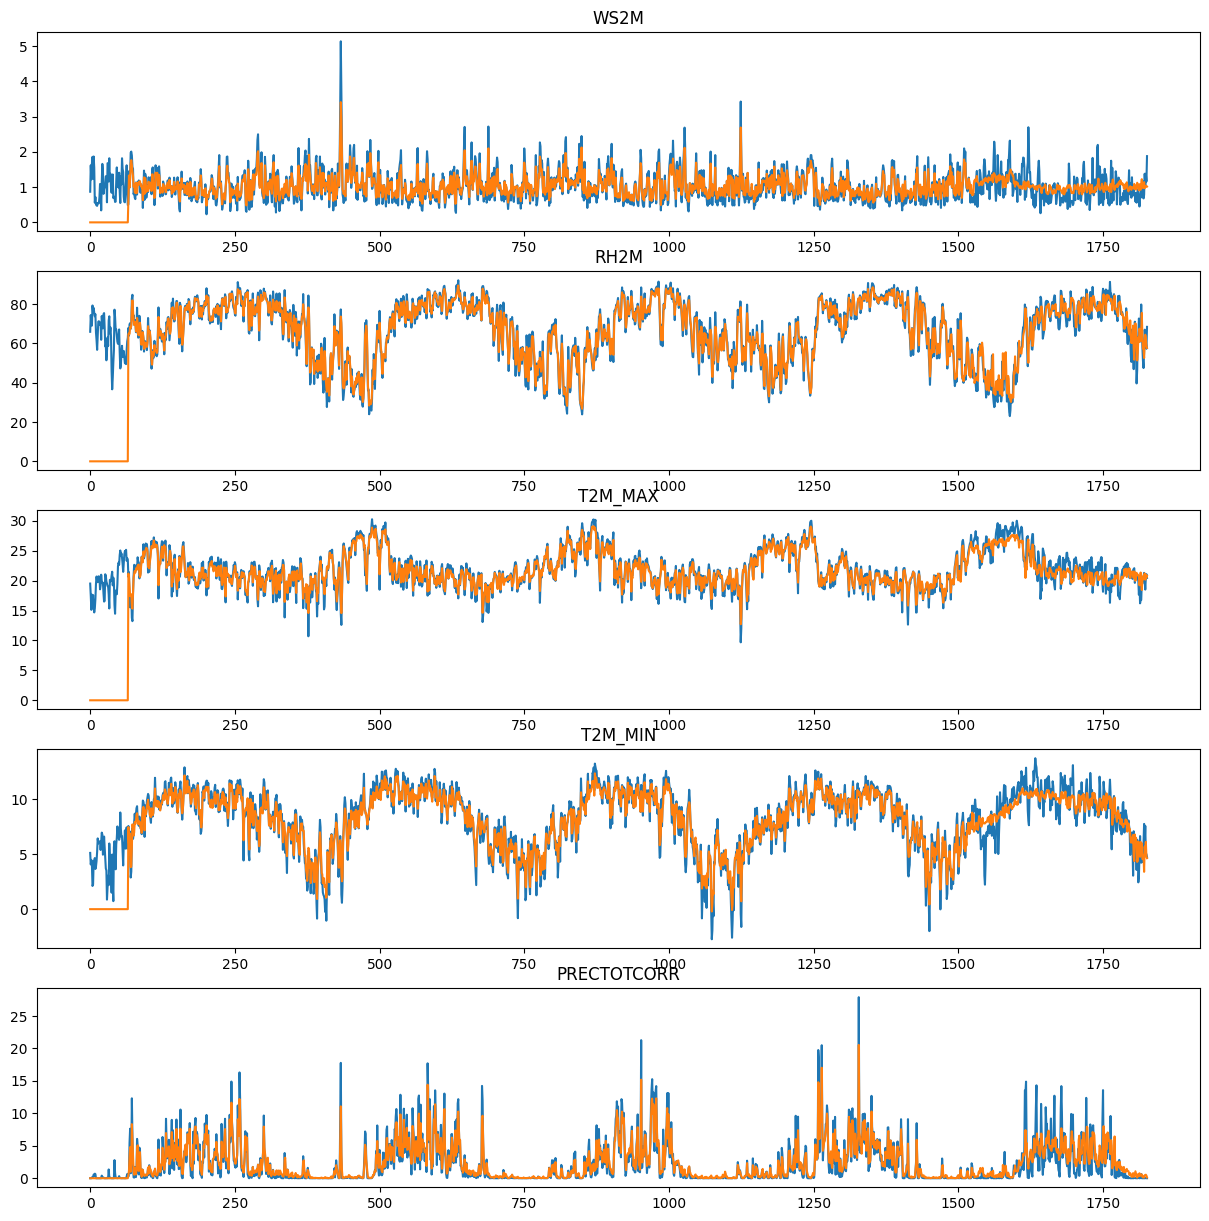

In [ ]:
pred = model.predict(val.drop(["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"],axis=1))
print(pred.shape)
print(data.shape)
for i in range(len(data)-len(pred)):
    pred = np.vstack((np.zeros((5,)),pred))

pred = pd.DataFrame(pred,columns=["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"])
fig,ax = plt.subplots(5,1,figsize=(15,15))
i = 0
for column in pred.columns:
    ax[i].plot(data[column].squeeze())
    ax[i].plot(pred[column].squeeze())
    ax[i].set_title(column)
    i+=1